## Phase-space decomposition via a machine-learned cubical complex 

First we import the functions that will be used.

In [8]:
from src.MLCD.jupyter_functions import train_classifier, compute_homology, make_decomposition_plot, make_polytope_plot, accuracy, plot_loss

### Code parameters

These are the parameters that can be changed before running the computation. The parameters set here override any parameters that are set in the configuration files.

The following systems are implemented:
- 'linear_separatrix' (2d)
- 'nonlinear_separatrix' (4d)
- 'radial_bistable' (2d)
- 'radial_tristable' (2d)
- 'M3D' (3d)
- 'hill_system_with_PO' (3d)
- 'ellipsoidal_bistable_2d'
- 'ellipsoidal_bistable_3d'
- 'ellipsoidal_bistable_4d'
- 'ellipsoidal_bistable_5d'

In [9]:
system = 'linear_separatrix'

N = 2 # number of nodes in the hidden layer of the network (must be an integer multiple of the dimension of the system)

labeling_threshold = 0.3 # threshold in (0, 1/2) used to label cubes

epochs = 20 # number of times that the data is cycled through during neural network training

config_file = f'config/{system}.txt'

### Train neural network

We obtained a trained model, which is a cubical neural network with a hidden layer of width ```N```.

In [10]:
model_filename = 'model'
model, train_loss_list, test_loss_list = train_classifier(system, N, epochs, model_filename, config_file)
accuracy = accuracy(system, model, labeling_threshold, config_file)

Epoch 1/20
Test loss: 0.506400
Train loss: 0.509000
Epoch 2/20
Test loss: 0.506400
Train loss: 0.490000
Epoch 3/20
Test loss: 0.506400
Train loss: 0.504000
Epoch 4/20
Test loss: 0.506400
Train loss: 0.520000
Epoch 5/20
Test loss: 0.506400
Train loss: 0.515000
Epoch 6/20
Test loss: 0.506400
Train loss: 0.491000
Epoch 7/20
Test loss: 0.506400
Train loss: 0.509000
Epoch 8/20
Test loss: 0.506400
Train loss: 0.498000
Epoch 9/20
Test loss: 0.506400
Train loss: 0.504000
Epoch 10/20
Test loss: 0.506400
Train loss: 0.516000
Epoch 11/20
Test loss: 0.506400
Train loss: 0.493000
Epoch 1/20
Test loss: 0.493844
Train loss: 0.516438
Epoch 2/20
Test loss: 0.493600
Train loss: 0.479000
Epoch 3/20
Test loss: 0.493600
Train loss: 0.489000
Epoch 4/20
Test loss: 0.493600
Train loss: 0.505000
Epoch 5/20
Test loss: 0.493600
Train loss: 0.520000
Epoch 6/20
Test loss: 0.493600
Train loss: 0.503000
Epoch 7/20
Test loss: 0.493600
Train loss: 0.513000
Epoch 8/20
Test loss: 0.493600
Train loss: 0.484000
Epoch 9/20

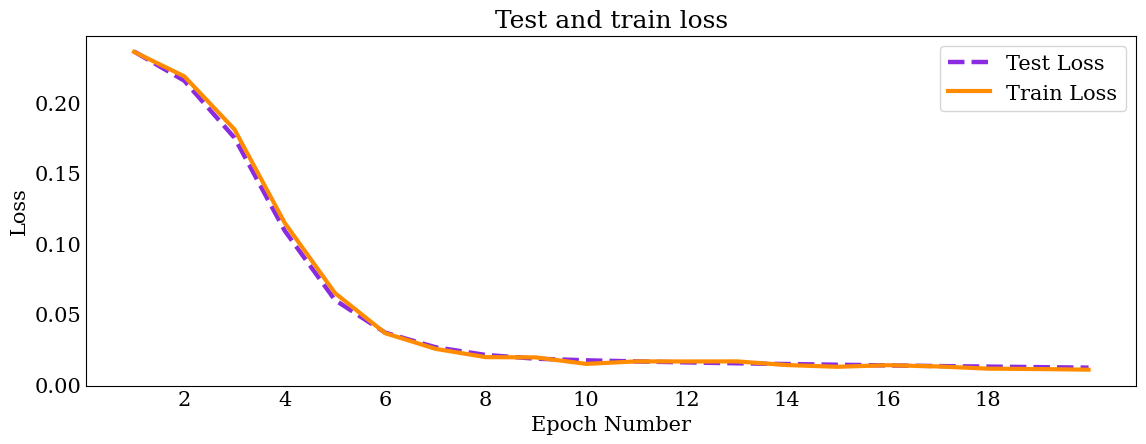

<Figure size 200x200 with 0 Axes>

In [11]:
file_name = 'loss'
plot_loss(system, test_loss_list, train_loss_list, file_name, config_file)

### Compute homology of labeled regions of the MLCD obtained from the neural network

We compute the homology of each of the labeled regions according to the decomposition determined by the trained model. The output is the Betti numbers.

If the region is empty, this is specified.

We also compute the number of labeled cubes.

In [12]:
labeling_threshold = 0.3
hyperplane_list, cube_list = compute_homology(system, labeling_threshold, N, model, config_file)

Betti numbers of label 0 region: [1, 0, 0]
Betti numbers of label 1 region: [1, 0, 0]
Betti numbers of uncertain region: [1, 0, 0]
Number of cubes labeled:  3


### Plot MLCD

The MLCD overlays points of phase space colored according to the value of the network.

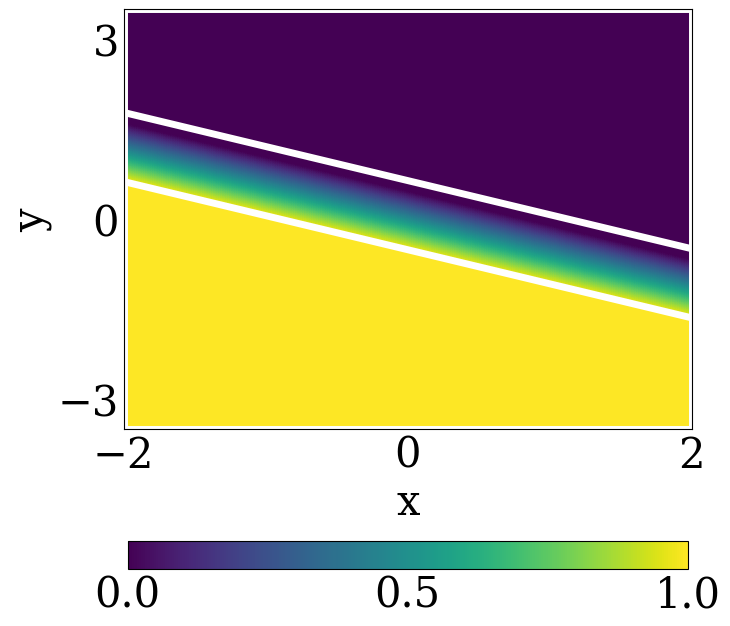

In [13]:
file_name = 'decomposition_plot'
make_decomposition_plot(system, hyperplane_list, model, file_name, config_file)

### Plot labeled cubes

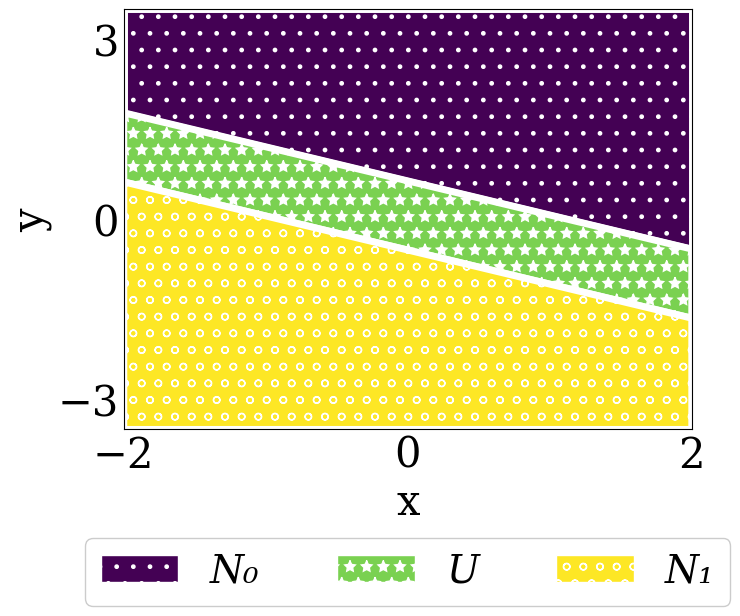

In [14]:
file_name = 'polytope_plot'
make_polytope_plot(system, cube_list, file_name, config_file)

### Changing further code parameters

Further parameters such as learning rate can be changed for each system in the configuration files.